In [1]:
import lsdb
import numpy as np
import sys
import pandas as pd
from astropy.coordinates import SkyCoord
sys.path.append('../src')

import LocusTools as lt
import BayesTools as bt
import PlotTools as pt

pd.set_option('display.max_columns', None)

Read photometric catalog with stars, for this we already prepared a small dataset based on SDSS S82.

Željko's pipeline example based on simulated TRILEGAL data had additionally the following cuts (only the first one can be implemented in S82): 
 - The input data are limited to 0.2 < g-i < 3.0 and 
 - -2.5 < FeH < 0 (probably OK in S82, maybe a few outliers) 
 - Mr > -1.0 (no very bright giants)
 - log(g) < 7 (no WDs, probably a small fraction exists in S82)
 - rmag < 26 (SDSS limiting mag is r~24, so this is not needed)

CPU times: user 8.93 s, sys: 2.44 s, total: 11.4 s
Wall time: 8.73 s


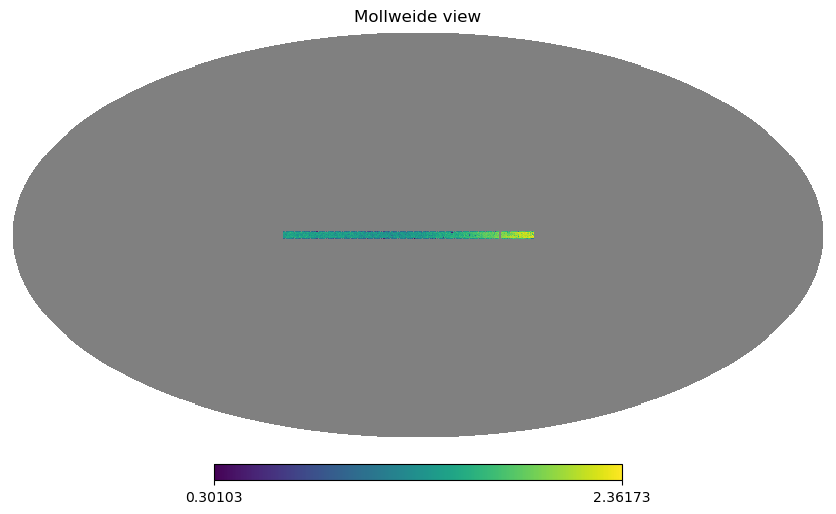

In [2]:
%%time 
s82 = lsdb.read_hipscat("/mnt/beegfs/scratch/data/S82_standards/S82_hipscat_fixed/")
s82.skymap(lambda df, a: np.log10(len(df)+1), order=9)

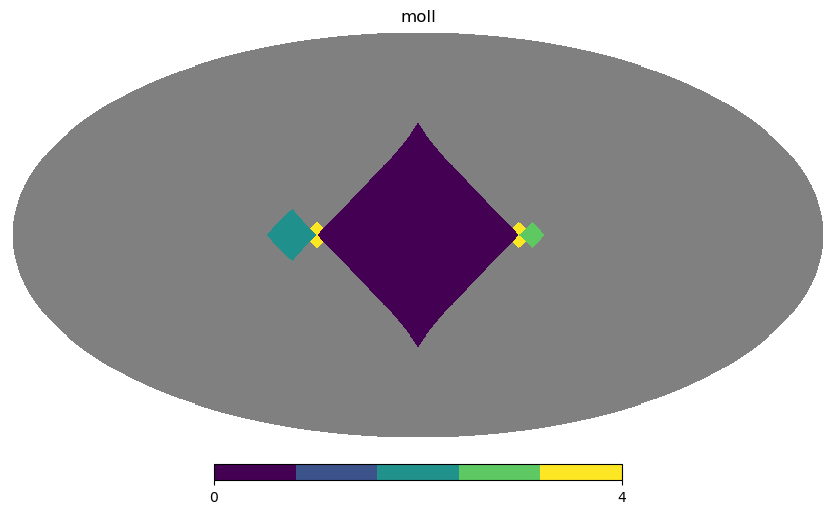

In [3]:
s82.plot_pixels()

Change some column names and add some columns (needed later on), and apply the gi cut.

Next, read the stellar locus parametrization.

In [4]:
LSSTlocus = lt.LSSTsimsLocus(fixForStripe82=True) # fixForStripe82 was originally set to False
## select the color range where we expect main sequence and red giants
OKlocus = LSSTlocus[(LSSTlocus['gi']>0.2)&(LSSTlocus['gi']<3.55)]   # gives MrMax < 15 (rerun priors!)

Fixing input Mr-FeH-colors grid to agree with the SDSS v4.2 catalog


Subsample Mr and FeH grids (linear speed-up but somewhat lower accuracy)

In [7]:
kMr = 10
kFeH = 2 
locusData = lt.subsampleLocusData(OKlocus, kMr, kFeH)

subsampled locus 2D grid in FeH and Mr from 51 1559 to: 25 155


Prepare the priors, see TRILEGAL-makePriors-forS82.ipynb notebook (work in progress).

Process data...

In [45]:
catalog = s82
fitColors = ('ug', 'gr', 'ri', 'iz')
priorsRootName = '/mnt/beegfs/scratch/lovro/photod-cmu/photoD/notebooks/results/S82_priors/5/0'
outfile = '/mnt/beegfs/scratch/lovro/photod-cmu/photoD/notebooks/results/S82_Bayes_estimates.txt'

Make 3D locus list with three ArGrid limits and resolutions.

In [46]:
ArGridList, locus3DList = lt.get3DmodelList(locusData, fitColors)

Select a range of stars to process.

In [75]:
iStart = 0
iEnd = -1 # if<0: do all stars
# myStars = [0, 100, 1000, 10000] # for illustration, make plots for these stars
myStars = [10, 36] # no plots
verb=True

In [76]:
_ = catalog.pixel_search([(5,0)]).compute()
_.Mr*0.0

_hipscat_index
715281479499776    -0.0
715101011181568    -0.0
714770441306112    -0.0
712559007105024    -0.0
713770364043264    -0.0
                   ... 
360351065440256    -0.0
369597584769024    -0.0
383946068066304    -0.0
1127069186523136   -0.0
377537611956224    -0.0
Name: Mr, Length: 3981, dtype: double[pyarrow]

Mr1d= -1.0 14.4 155
MrBright, MrFaint= -1.0 14.4
working on star 0
pts: 25 155


/mnt/beegfs/scratch/lovro/photod-cmu/photoD-old/notebooks/../src/BayesTools.py:1070: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  catalog['chi2min'][i] = np.min(chi2map)
/mnt/beegfs/scratch/lovro/photod-cmu/photoD-old/notebooks/../src/Bayes

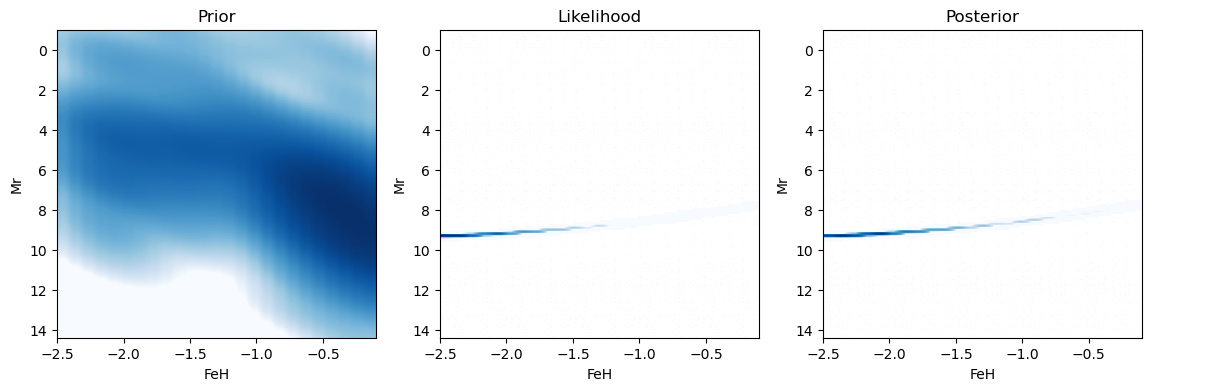

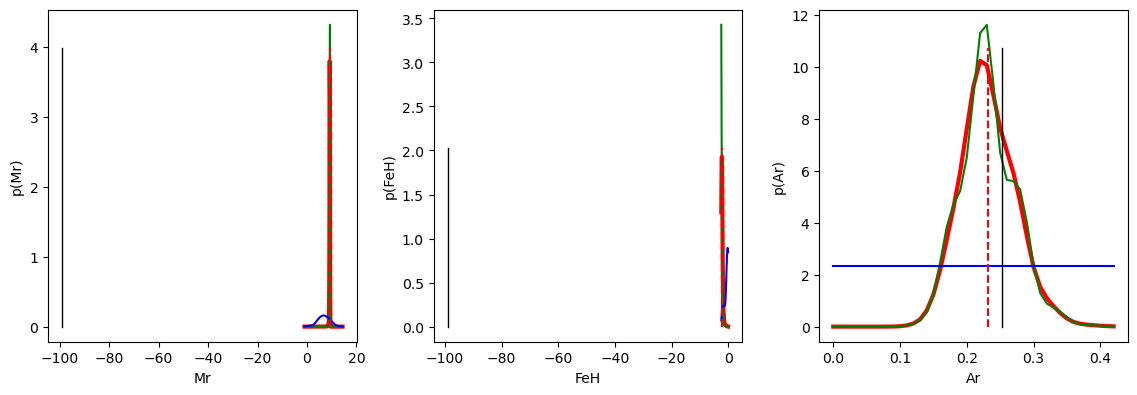

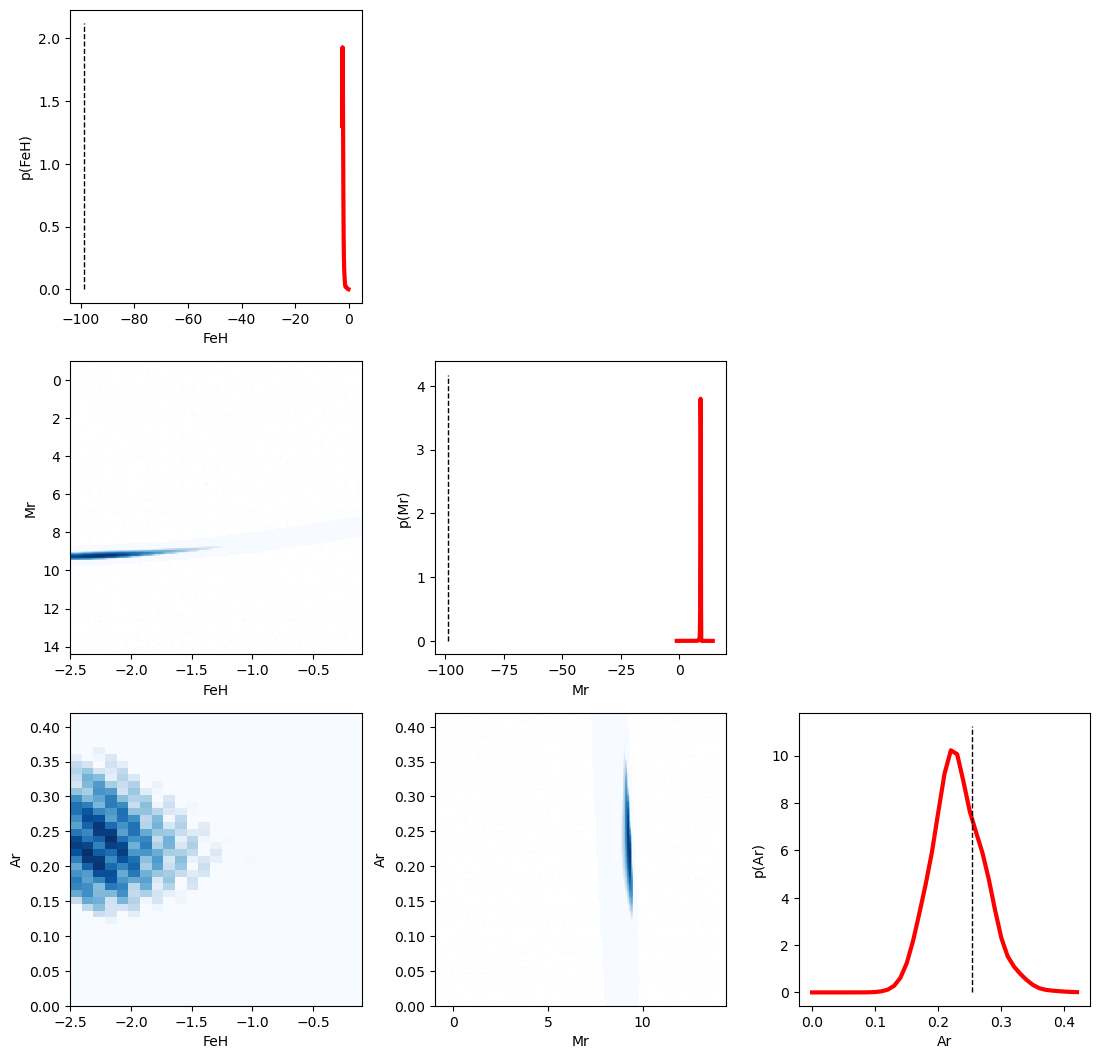

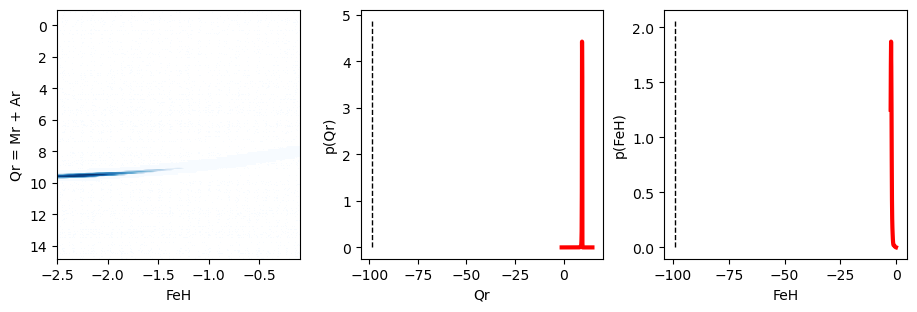

/mnt/beegfs/scratch/lovro/photod-cmu/photoD-old/notebooks/../src/BayesTools.py:1122: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  catalog['QrEst'][i], catalog['QrEstUnc'][i] = getStats(Qr1d, margpostQr)


 *** 3D Bayes results for star i= 10
r mag: 19.142 g-r: 1.3960000000000008 chi2min: 5.898444404934552
Mr: true= -99 estimate= 9.202121502690431  +-  0.1357301595622955
FeH: true= -99 estimate= -2.1983298409958674  +-  0.27121719100962705
Ar: true= 0.253 estimate= 0.23220979107342013  +-  0.04194445043053659
Qr: true= -98.747 estimate= 9.482721143088522  +-  0.12832458647362785
Mr drop in entropy: -45.09948727540982
FeH drop in entropy: -12.33500115198273
Ar drop in entropy: -132.49644314063607
pts: 25 155


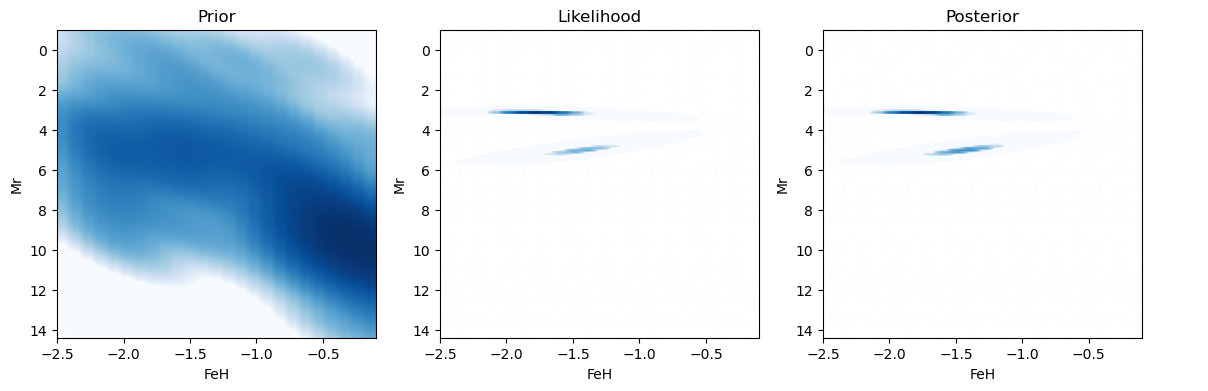

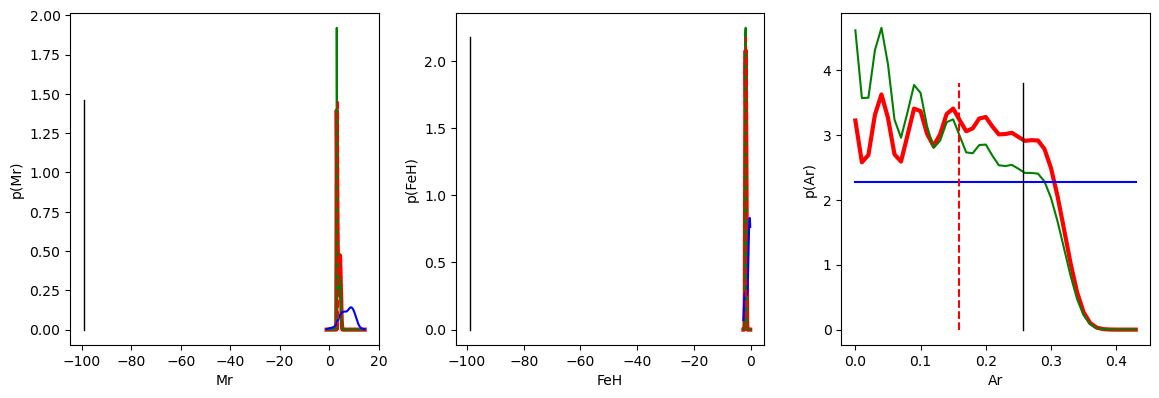

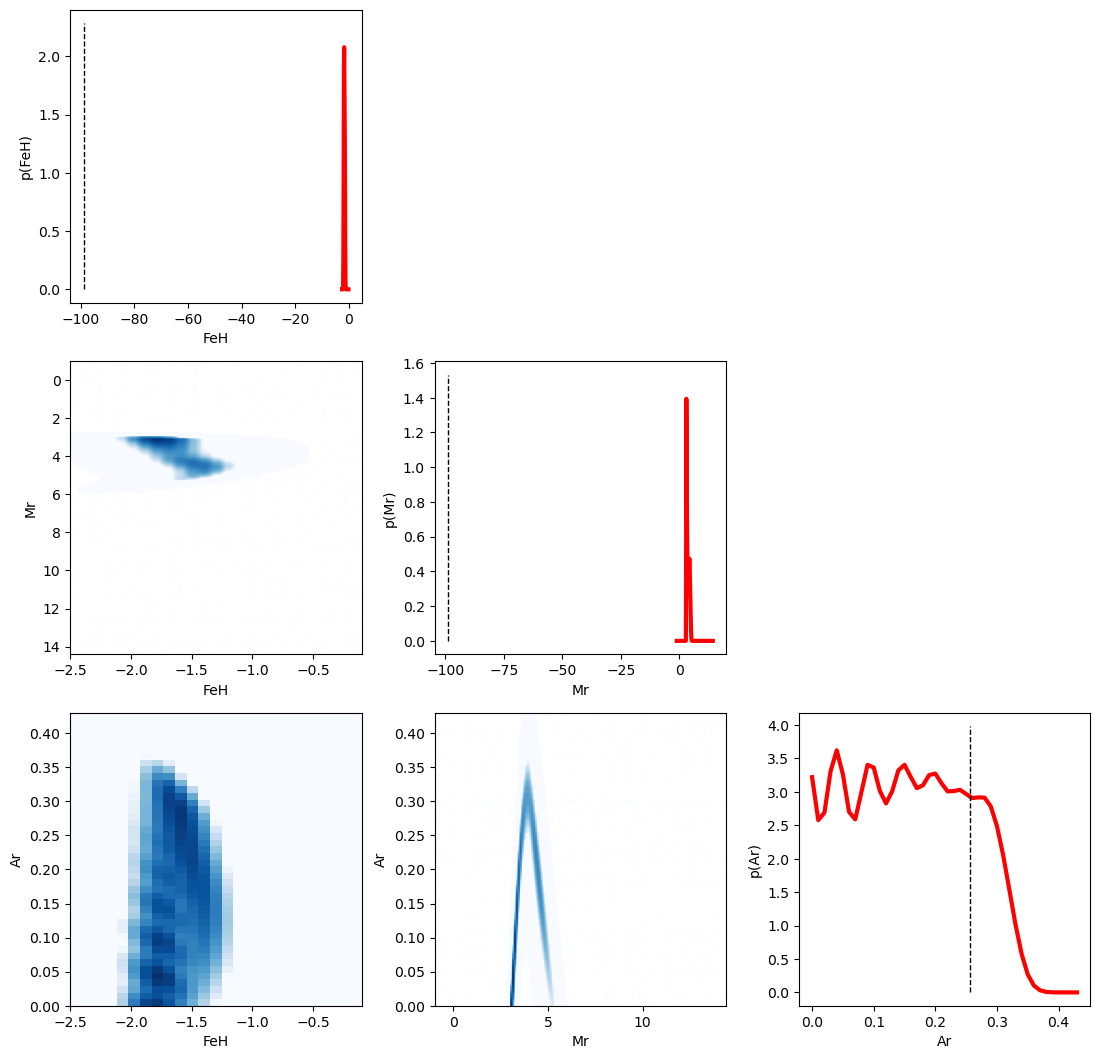

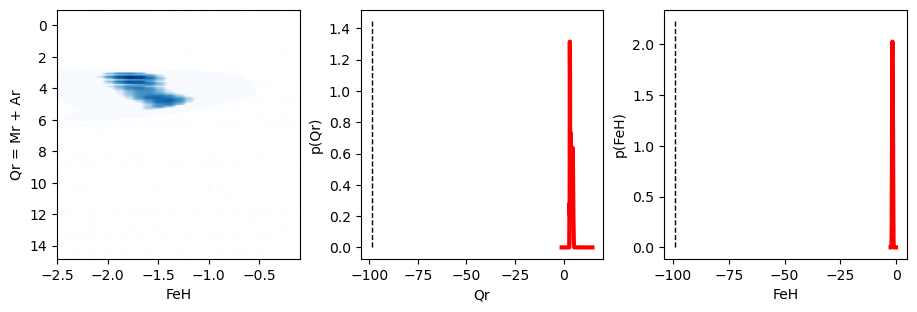

 *** 3D Bayes results for star i= 36
r mag: 20.047 g-r: 0.34999999999999787 chi2min: 3.7661313706234676
Mr: true= -99 estimate= 3.737965721492313  +-  0.5984270949182757
FeH: true= -99 estimate= -1.6521556331998444  +-  0.17891166874793274
Ar: true= 0.257 estimate= 0.1582493622861889  +-  0.09441072935346875
Qr: true= -98.743 estimate= 3.9571386554142576  +-  0.6362635018196573
Mr drop in entropy: -25.90437653085644
FeH drop in entropy: -15.511210992360706
Ar drop in entropy: -35.30515005330311


/mnt/beegfs/scratch/lovro/photod-cmu/photoD-old/notebooks/../src/BayesTools.py:430: RuntimeWarning: invalid value encountered in divide
  return pdf/np.sum(pdf)/dx


IndexError: single positional indexer is out-of-bounds

In [77]:
%%time
bt.makeBayesEstimates3D(_.reset_index(drop=True), fitColors, locusData, locus3DList, ArGridList, 
                        priorsRootName, outfile, iStart, iEnd, myStars, verbose=verb)